## BNN model
* Create a function f(x,z) = 13*xs + 7*zs - 12.
* Using L2-Norm objective function and gradient decent to minimize weight and bias for correct w and b
* y = xw + b +noise : linear regression(outpute and target)
* loss = summalation(output - targrt)**2 /observation/2
* optimize function(GD) : w  = w - learing_rate * summalation(input * (output - targrt) )
*                       : b  = b - learing_rate * summalation(output - targrt)

In [28]:
#import libiary
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [29]:
#Creating data (1000)
observation = 1000
xs = np.random.uniform(-10,10,(observation,1))

zs = np.random.uniform(-10,10,(observation,1))

in_put = np.column_stack((xs,zs))

print(in_put.shape)

(1000, 2)


In [30]:
#creating target
noise = np.random.uniform(-0.1,0.1,(observation,1))

target = 13 * xs + 7 * zs -12 + noise
#(1000,1) = (1000,1) * (1000,1) + (1000,1)
print(target.shape)

(1000, 1)


Text(0.5,0,'zs')

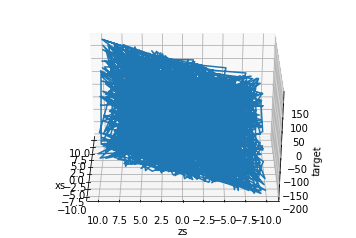

In [31]:
#visualization function
targets = target.reshape(observation,)

ax = plt.subplot(111,projection = '3d')

plt.plot(xs,zs,targets)
Axes3D.view_init(ax,azim = 180)
ax.set_xlabel('xs')
ax.set_zlabel('target')
ax.set_ylabel('zs')

In [32]:
# initial variable range
initial_rate = 0.1
w = np.random.uniform(-initial_rate,initial_rate,(2,1))
b = np.random.uniform(-initial_rate,initial_rate,(1,1))
print(w,b)

[[ 0.09623377]
 [-0.05466656]] [[-0.09133575]]


In [33]:
learning_rate = 0.03

In [39]:
# structure model
loss_log = []
time = 1000
# L2-norm Loss function
for i in range(time):
    out_put = np.dot(in_put,w) + b
#   (1000,1)      (1000,2)(2,1) (1,1) 
    delta = out_put - target
#   (1000,1)
    L2_loss = np.sum(delta**2) / observation / 2
    loss_log.append(L2_loss)

    delta_scale = delta / observation

#GD
    w = w - learning_rate * np.dot(in_put.T,delta_scale)
    # (2,1)                        (2,1000)*(1000*1)
    b = b - learning_rate * np.sum(delta_scale)

print(len(loss_log))

1000


w = [[13.00050197]
 [ 6.99962081]] 
b = [[-11.99986679]]

w error:[[-0.00050197]
 [ 0.00037919]]
b error:[[-0.00013321]]]


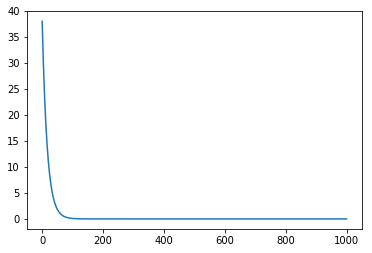

In [47]:
real_w = np.array([[13],[7]])
real_b = [[-12]]
print(f'w = {w} \nb = {b}\n\nw error:{real_w - w}\nb error:{real_b - b}]')

plt.plot(range(time),loss_log)

Text(0,0.5,'targets')

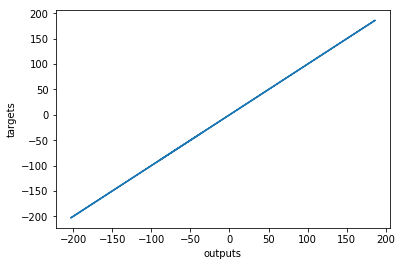

In [41]:
# visualization model

plt.plot(out_put,target)
plt.xlabel('outputs')
plt.ylabel('targets')
